<a href="https://colab.research.google.com/github/basangoudapatil/Task-8/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [22]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df = df.drop_duplicates()

**Splitting the dataset into the Training set and Test set**

In [10]:
from sklearn.model_selection import train_test_split

X = df.loc[:,['Age','EstimatedSalary']].values
y = df.loc[:,'Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

In [11]:
X_train.shape, y_train.shape

((280, 2), (280,))

In [12]:
X_train

array([[    28,  44000],
       [    34,  43000],
       [    37,  62000],
       [    35,  91000],
       [    53, 143000],
       [    26,  81000],
       [    39,  71000],
       [    38,  61000],
       [    42,  90000],
       [    47,  34000],
       [    41,  52000],
       [    25,  79000],
       [    58,  47000],
       [    32, 135000],
       [    35,  50000],
       [    37, 146000],
       [    31,  58000],
       [    32, 100000],
       [    37,  52000],
       [    28,  37000],
       [    60,  34000],
       [    48, 141000],
       [    41,  80000],
       [    42,  54000],
       [    52,  21000],
       [    42,  75000],
       [    30, 107000],
       [    47,  25000],
       [    23,  28000],
       [    29,  75000],
       [    30, 116000],
       [    47, 144000],
       [    58, 101000],
       [    28,  59000],
       [    42,  65000],
       [    37,  77000],
       [    27,  31000],
       [    60,  42000],
       [    45,  26000],
       [    48,  30000],


**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting SVM to the Training set**

In [16]:
from sklearn.svm import SVC
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in Kernels:
  model = SVC(kernel=k)
  model.fit(X_train, y_train)

  from sklearn.metrics import accuracy_score, roc_auc_score
  y_pred = model.predict(X_test)
  print('Kernel=',k, 'Accuracy=',accuracy_score(y_test, y_pred), 'AUROC score=',roc_auc_score(y_test, y_pred))

Kernel= linear Accuracy= 0.875 AUROC score= 0.8409306742640075
Kernel= poly Accuracy= 0.85 AUROC score= 0.802469135802469
Kernel= rbf Accuracy= 0.925 AUROC score= 0.9311490978157646
Kernel= sigmoid Accuracy= 0.7666666666666667 AUROC score= 0.7274453941120608


In [19]:
# from the above results rbf Kernel gives the highest AUROC score and better accuracy
# consider rbf kernel
model1 = SVC(kernel = 'rbf')
model1.fit(X_train, y_train)

SVC()

**Predicting the Test set results**

In [20]:
# Predicting the test results
y_pred = model1.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[74,  2],
       [ 7, 37]])

**Visualising the Training set results**

In [23]:
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

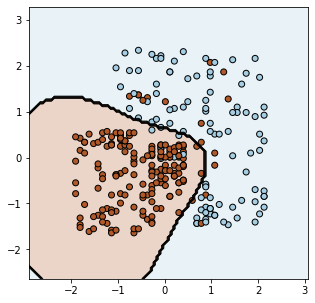

In [26]:
plot_decision_boundary(model1, X_train, y_train)

**Visualising the Test set results**

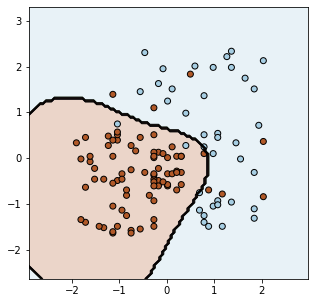

In [27]:
plot_decision_boundary(model1, X_test, y_test)